In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

from pylab import rcParams

#Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.externals.six import StringIO
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

#missing data visualization
import missingno as msno

from pylab import savefig
from sklearn.ensemble import IsolationForest


# for the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Dropout


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#import warnings
#warnings.filterwarnings("ignore")

Data info:
https://www.kaggle.com/kevinarvai/clinvar-conflicting/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=20312

Related paper: ClinVar :improving access to variant interpretations
and supporting evidence/ : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5753237/pdf/gkx1153.pdf


The Dataset was obtained by ClinVar, a public resource used to collect information about genetic variants. ClinVar classifies each of these variants into one of three categories:

1. Likely Benign or Benign
2. VUS (A variation in a genetic sequence for which the association with disease risk is unclear)
3. Likely Pathogenic or Pathogenic

The variants were categorized via manual testing by multiple labs. Conflicting categorizations have been assigned to the CLASS column, a 1 represents a conflicting categorizations by different labs while a 0 represents a consistent categorization.

In [170]:
df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)
# or we can do df = pd.read_csv('clinvar_conflicting.csv', dtype={'CHROM': str, 38: str, 40: object})

In [171]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [172]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
GENEINFO               6123
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [173]:
# drop columns with more than 50% of null values

df.replace({'':np.nan})
df = df.dropna(thresh=0.5*len(df), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 31 columns):
CHROM               65188 non-null object
POS                 65188 non-null int64
REF                 65188 non-null object
ALT                 65188 non-null object
AF_ESP              65188 non-null float64
AF_EXAC             65188 non-null float64
AF_TGP              65188 non-null float64
CLNDISDB            65188 non-null object
CLNDN               65188 non-null object
CLNHGVS             65188 non-null object
CLNVC               65188 non-null object
GENEINFO            59065 non-null object
MC                  58219 non-null object
ORIGIN              59065 non-null float64
CLASS               65188 non-null int64
Allele              65188 non-null object
Consequence         65188 non-null object
IMPACT              65188 non-null object
Feature_type        65174 non-null object
Feature             65174 non-null object
BIOTYPE             65172 non-null object
EXON   

In [174]:
df["Protein_position"].unique()


array(['4', '15', '23', ..., '258-260', '2593-2594', '2212-2213'],
      dtype=object)

In [175]:
df["CDS_position"].unique()


array(['11', '45', '67', ..., '248-252', '1491-1492', '1492-1494'],
      dtype=object)

In [176]:
df["cDNA_position"].unique()

array(['61', '95', '117', ..., '496-500', '1701-1702', '1702-1704'],
      dtype=object)

In [177]:
df["Feature"].unique()

array(['NM_001305275.1', 'NM_080605.3', 'NM_018188.3', ..., 'MA0341.1',
       nan, 'MA0546.1'], dtype=object)

In [178]:
# add column with a unique value of 65188
df.insert(0,"KEY", df.CLNHGVS)

In [179]:
df['KEY'].nunique()==len(df)

True

In [180]:
# For Protein_position, CDS_position, and cDNA_position, some numeric values were separated by '_' so we will clean it and use the first number.

def cleaning (df, columns):
    for col in columns:
        cleaning = pd.DataFrame(df[col][df[col].notnull()].str.split("-").tolist(), columns = ["X","Y"])
        cleaning["X"][cleaning["X"]=="?"] = cleaning["Y"]  # why do we do "?"
        key = df[[col,"KEY"]][df[col].notnull()]["KEY"]
        
        counter = 0
        
        for i in key.index:
            df[col][i] = cleaning["X"][counter]
            counter += 1
        df[col] = df[col].astype(float)
    return df
        


In [181]:
data_cleaning = cleaning (df, ["CDS_position","cDNA_position","Protein_position"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



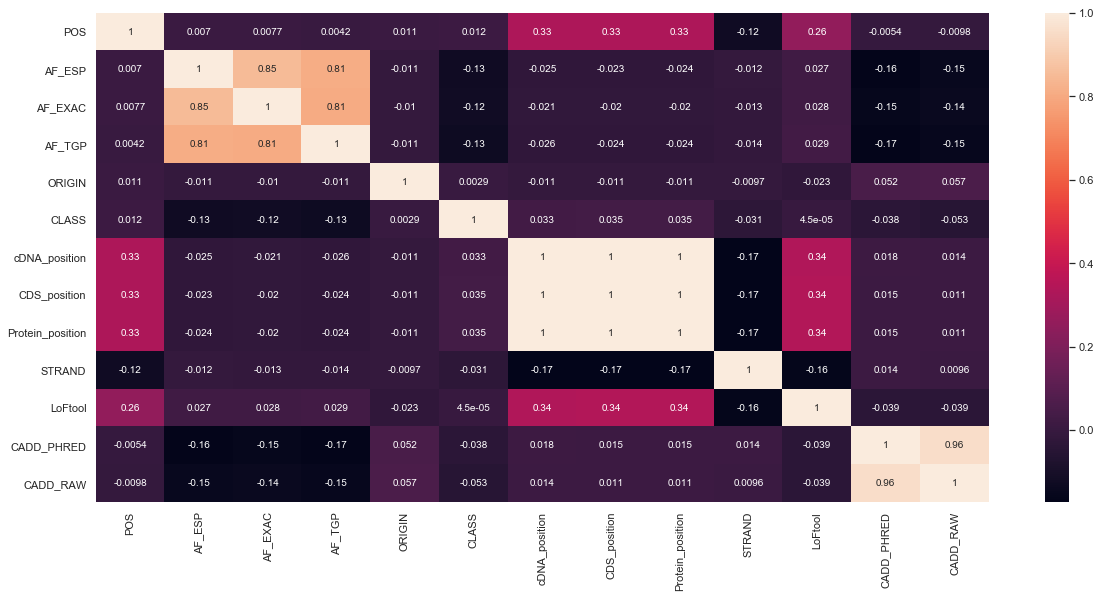

In [182]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), annot= True)
plt.show()


In [183]:
df[['cDNA_position','CDS_position','Protein_position']].describe()

,cDNA_position,CDS_position,Protein_position
count,56304.000000,55233.000000,55233.000000
mean,5058.884946,4897.622400,1632.857658
std,13100.781617,13204.047323,4401.355163
min,1.000000,1.000000,1.000000
25%,911.000000,709.000000,237.000000
50%,1844.000000,1626.000000,542.000000
75%,3900.000000,3692.000000,1231.000000
max,108207.000000,107961.000000,35987.000000


In [184]:
#Showing missing values on the bar graphic
#msno.bar(df, color = 'lightblue', sort ='descending')
#plt.show()
#msno.dendrogram(df)

In [185]:
def convert_to_float(df,columns):
  
  for col in columns:
       
    convert_to_float = pd.DataFrame(df[col][df[col].notnull()].str.split("/").tolist(),columns=["Numerator","Denominator"])
    convert_to_float = convert_to_float.astype("float")
    convert_to_float["Result"] = convert_to_float["Numerator"] / convert_to_float["Denominator"]
    key =df[[col,"KEY"]][df[col].notnull()]["KEY"]

    counter = 0
    for i in key.index:

      df[col][i] = convert_to_float["Result"][counter]
      counter += 1
    df[col] = df[col].astype(float)

  return df

In [186]:
df = convert_to_float(df, ["EXON"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
df_drop_numeric = df.drop(['GENEINFO','Codons','MC','Feature_type','Allele','Consequence','IMPACT','REF','ALT','Feature','Amino_acids','Codons','BIOTYPE'], axis =1)

In [188]:
# change into float
change = LabelEncoder()
df_drop_numeric['CHROM'] = change.fit_transform(df_drop_numeric['CHROM']).astype('float64')
df_drop_numeric['KEY'] = change.fit_transform(df_drop_numeric['KEY']).astype('float64')
df_drop_numeric['POS'] = change.fit_transform(df_drop_numeric['POS']).astype('float64')
df_drop_numeric['CLNVC'] = change.fit_transform(df_drop_numeric['CLNVC']).astype('float64')
df_drop_numeric['CLNHGVS'] = change.fit_transform(df_drop_numeric['CLNHGVS']).astype('float64')
df_drop_numeric['CLNDN'] = change.fit_transform(df_drop_numeric['CLNDN']).astype('float64')
df_drop_numeric['CLNDISDB'] = change.fit_transform(df_drop_numeric['CLNDISDB']).astype('float64')





In [189]:
df_drop_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 20 columns):
KEY                 65188 non-null float64
CHROM               65188 non-null float64
POS                 65188 non-null float64
AF_ESP              65188 non-null float64
AF_EXAC             65188 non-null float64
AF_TGP              65188 non-null float64
CLNDISDB            65188 non-null float64
CLNDN               65188 non-null float64
CLNHGVS             65188 non-null float64
CLNVC               65188 non-null float64
ORIGIN              59065 non-null float64
CLASS               65188 non-null int64
EXON                56295 non-null float64
cDNA_position       56304 non-null float64
CDS_position        55233 non-null float64
Protein_position    55233 non-null float64
STRAND              65174 non-null float64
LoFtool             60975 non-null float64
CADD_PHRED          64096 non-null float64
CADD_RAW            64096 non-null float64
dtypes: float64(19), int64(1)
mem

In [190]:
#df_drop = df_drop.apply(pd.to_numeric, errors='coerce')<-If you do this, you get NaN from object columns for some features..

In [191]:
df_numeric = df.drop(['Allele','Consequence','IMPACT','REF','ALT','Feature','Amino_acids','Codons','BIOTYPE'], axis =1)

In [192]:
df_drop_numeric.dropna(axis = 0, inplace = True)

In [193]:
df_drop_numeric.isnull().sum()

KEY                 0
CHROM               0
POS                 0
AF_ESP              0
AF_EXAC             0
AF_TGP              0
CLNDISDB            0
CLNDN               0
CLNHGVS             0
CLNVC               0
ORIGIN              0
CLASS               0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
STRAND              0
LoFtool             0
CADD_PHRED          0
CADD_RAW            0
dtype: int64

In [194]:
#df_drop.CHROM.value_counts()
#MT ->22, X-> 23

In [195]:
# change CHROM variables into integers (numeric variables).
#df['CHROM'] = df['CHROM'].astype('str').apply(lambda x: x.strip())
#df['CHROM'] = df['CHROM'].astype('category')

In [196]:
# CLASS column contains 0 or 1 value for classification
df.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

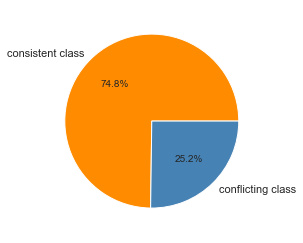

In [197]:
labels = 'consistent class' , 'conflicting class'
values = df['CLASS'].value_counts()
colors = ['darkorange','steelblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%.1f%%',colors =colors)
plt.show()

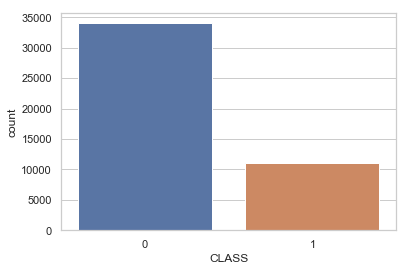

In [198]:
sns.countplot(df_drop_numeric['CLASS'], label= "count" )

In [199]:
df_drop_result = pd.DataFrame()
df_drop_result['CLASS'] = df_numeric.CLASS

In [200]:
df_drop_result = df_drop_result.astype('float64')

In [201]:
df_drop_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 1 columns):
CLASS    65188 non-null float64
dtypes: float64(1)
memory usage: 509.4 KB


# split data into train and test sets

In [202]:
X = df_drop_numeric.drop('CLASS', axis=1)
y = df_drop_numeric['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)




# Isolation Forest

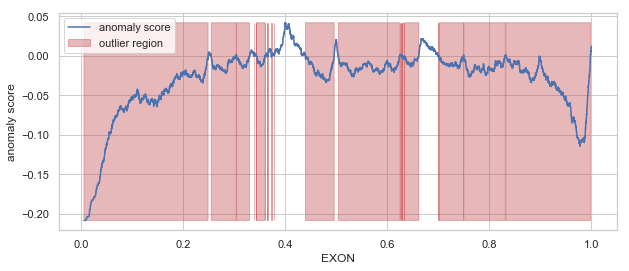

In [203]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_drop_numeric['EXON'].values.reshape(-1, 1))
xx = np.linspace(df_drop_numeric['EXON'].min(), df_drop_numeric['EXON'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('EXON')
plt.show();


In [204]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IsolationForest(contamination=outliers_fraction,random_state=0)
clf.fit(X_train)
scores_pred = clf.decision_function(X_train) * -1

y_pred = clf.predict(X_train)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df_drop_numeric
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['AF_ESP'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['CADD_RAW'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['AF_ESP'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['CADD_RAW'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

ValueError: Length of values does not match length of index

<Figure size 576x576 with 0 Axes>

# Logistic regression

In [205]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
class_pred_class_log = logreg.predict(X_test)

In [206]:
cm = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[3435    0]
 [1073    0]]


# Gradient Boosting

In [207]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2178


In [208]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[3359   76]
 [ 906  167]]


In [209]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      3435
           1       0.69      0.16      0.25      1073

    accuracy                           0.78      4508
   macro avg       0.74      0.57      0.56      4508
weighted avg       0.76      0.78      0.73      4508



# XGBoost Model

In [210]:
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]





In [211]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[3349   86]
 [ 896  177]]


In [212]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      3435
           1       0.67      0.16      0.26      1073

    accuracy                           0.78      4508
   macro avg       0.73      0.57      0.57      4508
weighted avg       0.76      0.78      0.73      4508



# Balanced data

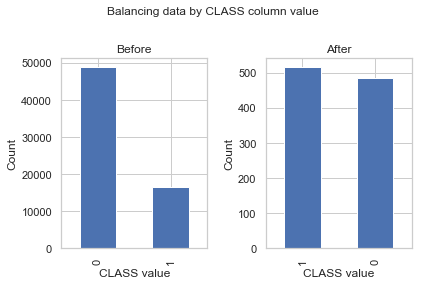

In [213]:
# Balance
g = df_drop_numeric.groupby('CLASS')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
# Extract smaller sample to avoid memory error later, when training starts
df_balanced = df_balanced.sample(1000)

# Illustrate balancing results on plots
f, ax = plt.subplots(1,2)
# Before balancing plot
df.CLASS.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Before")
ax[0].set_xlabel("CLASS value")
ax[0].set_ylabel("Count")
# After balanced plot
df_balanced.CLASS.value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title("After")
ax[1].set_xlabel("CLASS value")
ax[1].set_ylabel("Count")

plt.suptitle("Balancing data by CLASS column value")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



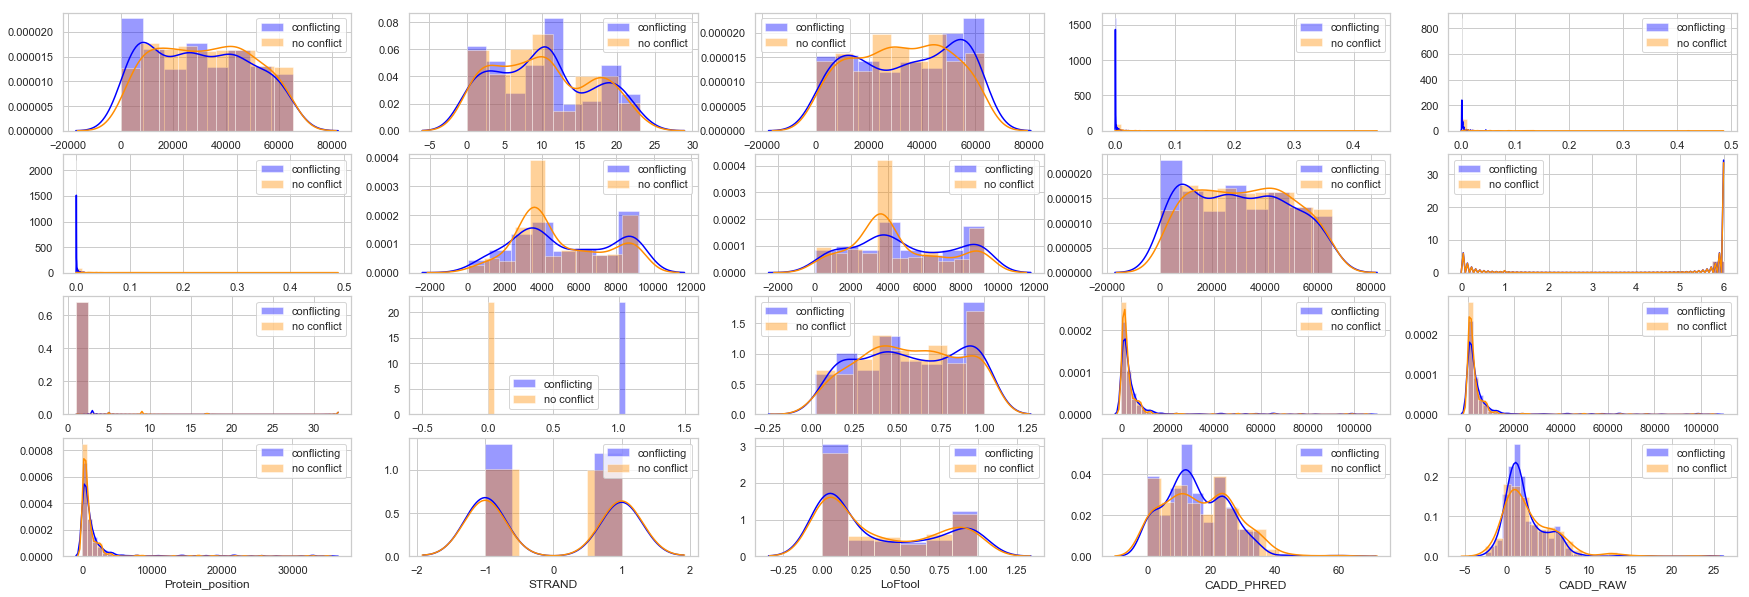

In [214]:
fig = plt.figure(figsize = (30,10))
j = 0 
for i in df_drop_numeric.columns:
    plt.subplot(4, 5, j+1)
    j += 1
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 1], color = 'blue', label = 'conflicting')
    sns.distplot(df_balanced[i][df_balanced['CLASS'] == 0], color = 'darkorange', label = 'no conflict')
    plt.legend(loc = 'best')
plt.show()

https://www.kaggle.com/vasilyb/clinvar-identifying-conflicting-genetic-variants

In [215]:
X = df_balanced.drop('CLASS', axis=1)
# one hot encoding?
y = df_balanced['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



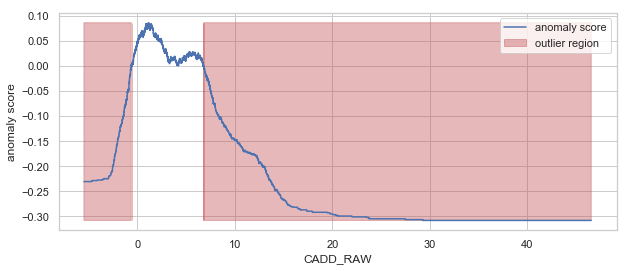

In [216]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_drop_numeric['CADD_RAW'].values.reshape(-1, 1))
xx = np.linspace(df_drop_numeric['CADD_RAW'].min(), df_drop_numeric['CADD_RAW'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('CADD_RAW')
plt.show();




# logistic regression

In [217]:
logreg = LogisticRegression(C=100 ,solver='lbfgs')  

logreg.fit(X_train, y_train)
class_pred_class_log = logreg.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [218]:
class_pred_class_log

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [219]:
cm = metrics.confusion_matrix(y_test, class_pred_class_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[19 24]
 [13 44]]


In [220]:
print("Logistic Regression Classification Report:\n", metrics.classification_report(y_test, class_pred_class_log))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.44      0.51        43
           1       0.65      0.77      0.70        57

    accuracy                           0.63       100
   macro avg       0.62      0.61      0.61       100
weighted avg       0.62      0.63      0.62       100



In [221]:
#If the values of a certain independent variable (feature) are skewed, 
#depending on the model, skewness may violate model assumptions (e.g. logistic regression)
#or may impair the interpretation of feature importance.

In [222]:
 #Shapiro-Wilks test to see if data is skewed
    
data_test = X_train
from scipy.stats import shapiro
shapiro(data_test)[1]

    
    

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



0.0

In [223]:
#num_feats = X_train.dtypes[df.dtypes!='object'].index
#skew_feats = X_train[num_feats].skew().sort_values(ascending=False)
#skewness = pd.DataFrame({'Skew':skew_feats})

In [224]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm1 = metrics.confusion_matrix(y_test, y_pred)
print("SVM confusion matrix:\n",cm1)

SVM confusion matrix:
 [[18 25]
 [ 8 49]]


In [225]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [226]:
cm2 = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[34  9]
 [10 47]]


In [227]:
# Some models like decision trees are fairly robust to skewed features.

In [228]:
# data input without scaling

X = df_balanced.drop('CLASS', axis=1)
y = df_balanced['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [229]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

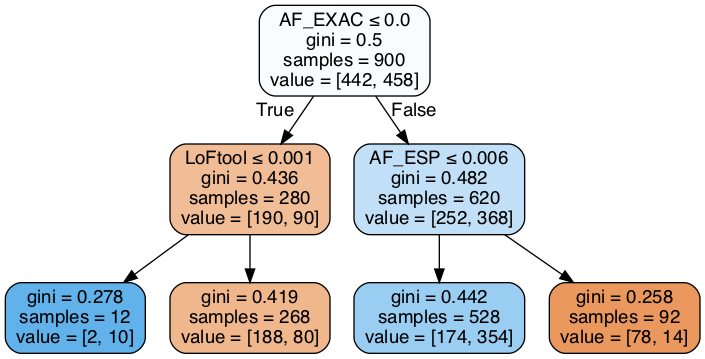

In [230]:
#make a decision tree 
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision Tree Train/Test RMSE: 0.6164414002968976   0.5567764362830022
Decision Tree Train/Test RMSE: 0.5477225575051661   0.4898979485566356
Decision Tree Train/Test RMSE: 0.5385164807134504   0.5
Decision Tree Train/Test RMSE: 0.5249338582674541   0.5
Decision Tree Train/Test RMSE: 0.49888765156985887   0.5
Decision Tree Train/Test RMSE: 0.4749268949591669   0.5385164807134504
Decision Tree Train/Test RMSE: 0.4496912521077347   0.5385164807134504
Decision Tree Train/Test RMSE: 0.4216370213557839   0.5385164807134504
Decision Tree Train/Test RMSE: 0.38005847503304596   0.5567764362830022
Decision Tree Train/Test RMSE: 0.3559026084010437   0.5744562646538028


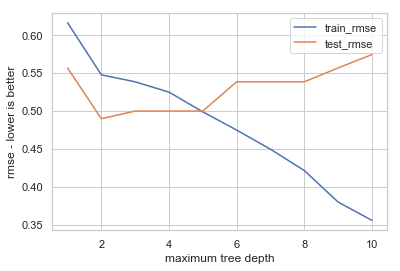

In [231]:
# measure testing errors 
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()


In [232]:
best_decision_tree = DecisionTreeClassifier(max_depth=3)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

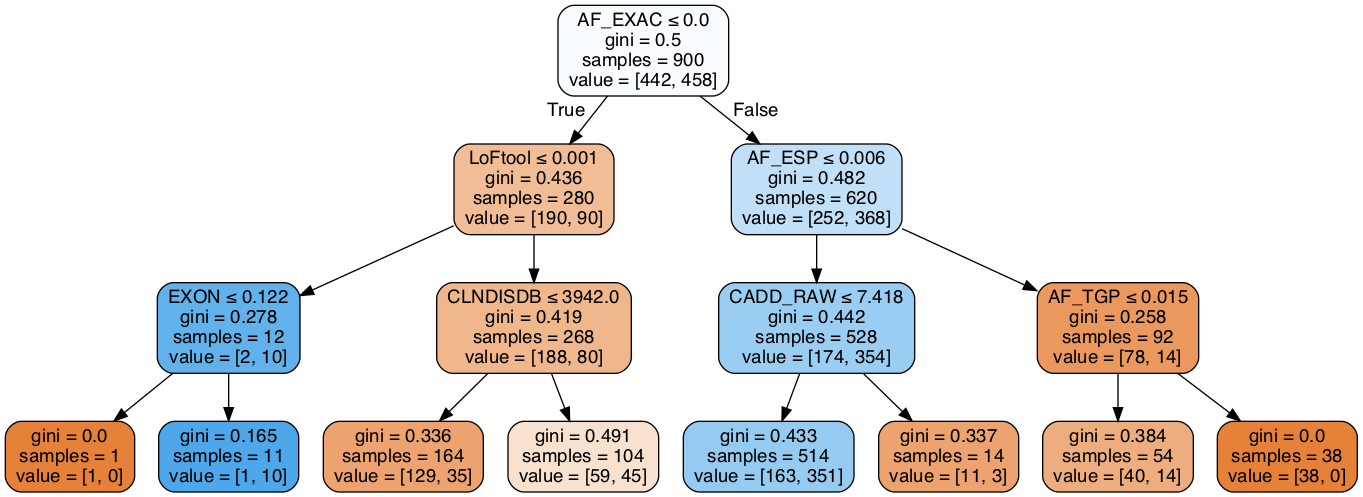

In [233]:
dot_data2 = StringIO()  
export_graphviz(best_decision_tree, out_file=dot_data2,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph_best = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph_best.create_png()) 

In [234]:
# use fitted model to make predictions on testing data
y_pred = best_decision_tree.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [235]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

#ValueError: Classification metrics can't handle a mix of binary and continuous targets

confusion matrix:
 [[29 14]
 [11 46]]


In [236]:
print(" Classification Report:\n", metrics.classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70        43
           1       0.77      0.81      0.79        57

    accuracy                           0.75       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100



# Gradient Boosting

In [237]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2500


In [238]:
cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

confusion matrix:
 [[30 13]
 [12 45]]


In [239]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71        43
           1       0.78      0.79      0.78        57

    accuracy                           0.75       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100



In [240]:
# buidling neural network
X = df_balanced.drop('CLASS', axis=1)
y = df_balanced['CLASS']


# normalize using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#splitting the dataset into the training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)



In [241]:
classifier = Sequential()

In [242]:
classifier.add(Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [243]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

ValueError: Error when checking input: expected dense_4_input to have shape (30,) but got array with shape (19,)

In [244]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

ValueError: Error when checking input: expected dense_4_input to have shape (30,) but got array with shape (19,)

In [ ]:

cm2 = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm2)

In [ ]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Additional EDA

In [ ]:
# In order to find where the most variants are located, use "CHROM" column

In [245]:
df.head()

,KEY,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,NC_000001.10:g.955563G>C,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",...,0.025641,61.0,11.0,4.0,R/P,cGg/cCg,1.0,0.421,11.390,1.133255
1,NC_000001.10:g.955597G>T,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,not_specified,...,0.025641,95.0,45.0,15.0,P,ccG/ccT,1.0,0.421,8.150,0.599088
2,NC_000001.10:g.955619G>C,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",...,0.025641,117.0,67.0,23.0,V/L,Gtc/Ctc,1.0,0.421,3.288,0.069819
3,NC_000001.10:g.957640C>T,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",...,0.051282,311.0,261.0,87.0,D,gaC/gaT,1.0,0.421,12.560,1.356499
4,NC_000001.10:g.976059C>T,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,not_specified,...,0.102564,576.0,526.0,176.0,L,Ctg/Ttg,1.0,0.421,17.740,2.234711


In [246]:
df.corr()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,EXON,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.010502,0.012061,0.021837,0.327991,0.329113,0.329112,-0.122896,0.257226,-0.005409,-0.009753
AF_ESP,0.007003,1.000000,0.851870,0.807741,-0.010724,-0.126538,0.000099,-0.024619,-0.023500,-0.023506,-0.011551,0.027343,-0.164169,-0.148118
AF_EXAC,0.007721,0.851870,1.000000,0.805634,-0.010286,-0.121213,0.001589,-0.021365,-0.020213,-0.020218,-0.013358,0.027831,-0.154891,-0.140803
AF_TGP,0.004225,0.807741,0.805634,1.000000,-0.011208,-0.130077,-0.000339,-0.025682,-0.023830,-0.023836,-0.014002,0.029447,-0.167057,-0.150989
ORIGIN,0.010502,-0.010724,-0.010286,-0.011208,1.000000,0.002920,0.008834,-0.010810,-0.011175,-0.011173,-0.009731,-0.023043,0.051741,0.057404
CLASS,0.012061,-0.126538,-0.121213,-0.130077,0.002920,1.000000,0.011078,0.032892,0.035065,0.035065,-0.031369,0.000045,-0.037713,-0.053485
EXON,0.021837,0.000099,0.001589,-0.000339,0.008834,0.011078,1.000000,0.235224,0.236040,0.236040,-0.022389,-0.038996,0.026073,0.037106
cDNA_position,0.327991,-0.024619,-0.021365,-0.025682,-0.010810,0.032892,0.235224,1.000000,0.999889,0.999889,-0.170250,0.338359,0.018138,0.014102
CDS_position,0.329113,-0.023500,-0.020213,-0.023830,-0.011175,0.035065,0.236040,0.999889,1.000000,1.000000,-0.172734,0.340800,0.014677,0.010855
Protein_position,0.329112,-0.023506,-0.020218,-0.023836,-0.011173,0.035065,0.236040,0.999889,1.000000,1.000000,-0.172734,0.340800,0.014702,0.010879


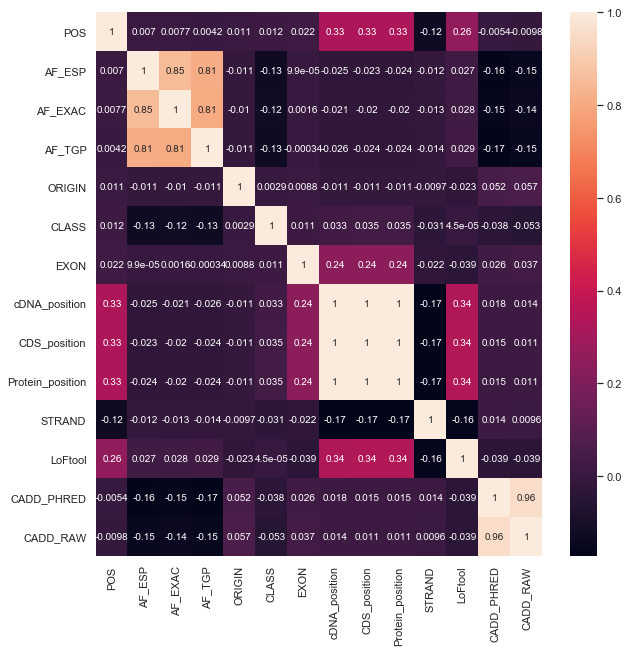

In [247]:
fig, ax = plt.subplots (figsize = (10,10))
sns.heatmap(df.corr(), annot = True, ax= ax)
plt.show()

In [248]:
# compare allele frequencies from different sources.
#CADD is a tool for scoring the deleteriousness of single nucleotide variants as well as insertion/deletions variants in the human genome.


In [249]:
#MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP

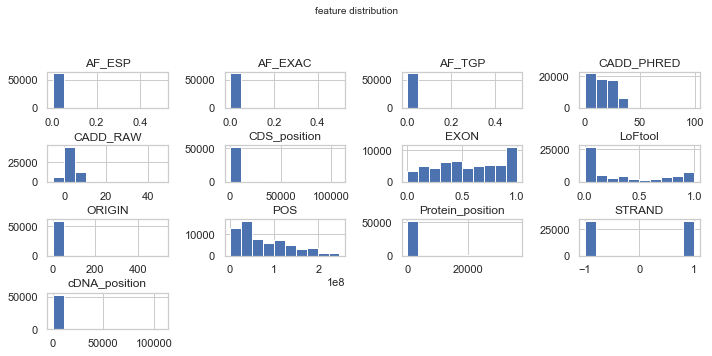

In [250]:
df.drop('CLASS', axis =1).hist(figsize = (10,5))
plt.suptitle("feature distribution", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, 'Consequence of varients with confliciting class')

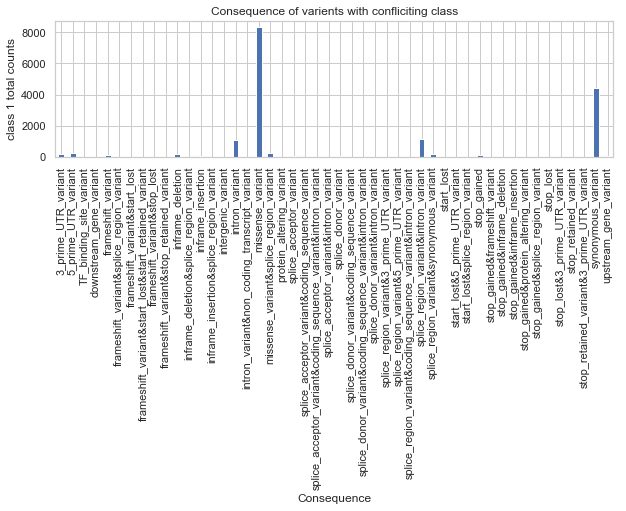

In [251]:
plt.figure(figsize = (10,2.5), frameon = False)
df.groupby('Consequence')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Consequence of varients with confliciting class')

Text(0.5, 1.0, 'Chromosome location of varients with confliciting class')

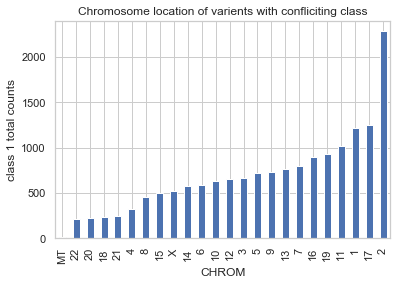

In [252]:
df.groupby('CHROM')['CLASS'].sum().sort_values().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Chromosome location of varients with confliciting class')

# how do I sort values here?

In [253]:
df_class0 = df[df['CLASS'] == 0]

In [254]:
df_class0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48754 entries, 0 to 65183
Data columns (total 32 columns):
KEY                 48754 non-null object
CHROM               48754 non-null object
POS                 48754 non-null int64
REF                 48754 non-null object
ALT                 48754 non-null object
AF_ESP              48754 non-null float64
AF_EXAC             48754 non-null float64
AF_TGP              48754 non-null float64
CLNDISDB            48754 non-null object
CLNDN               48754 non-null object
CLNHGVS             48754 non-null object
CLNVC               48754 non-null object
GENEINFO            44367 non-null object
MC                  43775 non-null object
ORIGIN              44367 non-null float64
CLASS               48754 non-null int64
Allele              48754 non-null object
Consequence         48754 non-null object
IMPACT              48754 non-null object
Feature_type        48749 non-null object
Feature             48749 non-null object
BIOTYPE

Text(0.5, 1.0, 'mutation types with confliciting class')

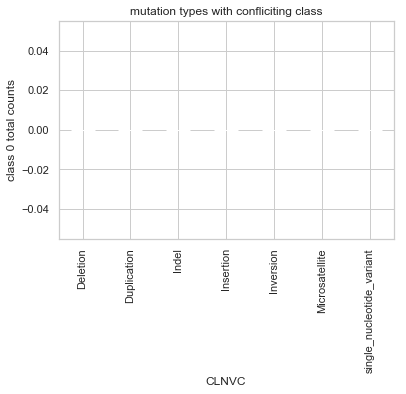

In [255]:
df_class0.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('mutation types with confliciting class')

Text(0.5, 1.0, 'mutation types with confliciting class')

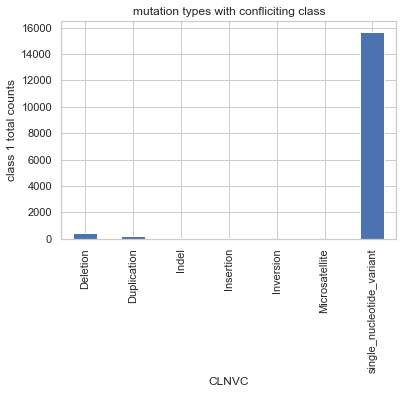

In [256]:
df.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('mutation types with confliciting class')

Text(0.5, 1.0, 'impact of mutation with confliciting class')

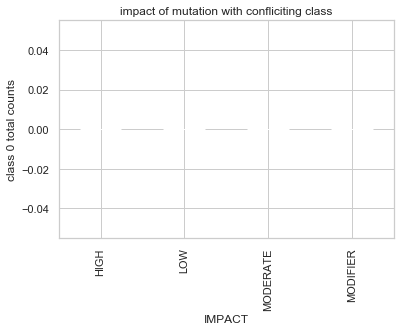

In [257]:
df_class0.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 0 total counts')
plt.title('impact of mutation with confliciting class')

Text(0.5, 1.0, 'impact of mutation with confliciting class')

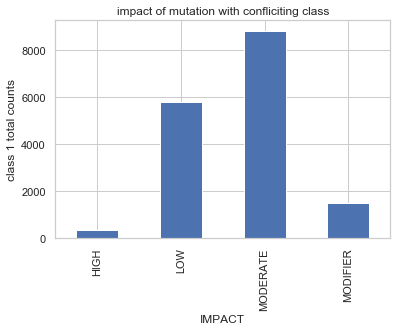

In [258]:
df.groupby('IMPACT')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('impact of mutation with confliciting class')